# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

# Import Libraries

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, precision_score, recall_score, f1_score

# Load the Dataset and make EDA

- Print the head, tail, describe, info, shape.

In [67]:
df = pd.read_csv("soil_measures.csv")

print(df.head())
print(df.info())
print(df.shape)
print(df.describe().T)
print(df.crop.unique())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None
(2200, 5)
     count       mean        std       min        25%        50%        75%  \
N   2200.0  50.551818  36.917334  0.000000  21.000000  37.000000  84.250000   
P   2200.0  53.362727  32.985883  5.000000  28.000000  51.000000  68.000000   
K   2200.0  48.149091  50.647931  5.000000  20.000000  32.000000  49.000000   
ph  2200.0   6.469480   0.773938  3.504752   5.971693   6.425

# Check the number of classes in the target label

In [68]:
print(df.crop.nunique())

22


# Check is there missing data

In [69]:
df.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [70]:
# Preprocessing

le = preprocessing.LabelEncoder()
df['crop'] = le.fit_transform(df['crop'])
df['crop'] = df['crop'].astype('category')
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

df

,N,P,K,ph,crop
0,0.642857,0.264286,0.190,0.466264,20
1,0.607143,0.378571,0.180,0.549480,20
2,0.428571,0.357143,0.195,0.674219,20
3,0.528571,0.214286,0.175,0.540508,20
4,0.557143,0.264286,0.185,0.641291,20
...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.509353,5
2196,0.707143,0.071429,0.110,0.401561,5
2197,0.842857,0.200000,0.125,0.444433,5
2198,0.835714,0.192857,0.145,0.506045,5


# Train test split

- Test size is 20%

In [71]:
from sklearn.model_selection import train_test_split



X = df.iloc[:, :-1]
y = df['crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}')


(1760, 4), (440, 4), (1760,), (440,)


# Train a multiclass logistic regression model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [72]:
model = LogisticRegression(multi_class='auto', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.5840909090909091
F1 Score: 0.529693145135989
Precision: 0.708563795817804
Recall: 0.5840909090909091
Confusion Matrix:
[[ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  6  0  0  0  3  0  0  8  0  0]
 [ 0  0  0  0  0  9  7  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0  8  0  0  0  0  0  0  2  0  1  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14 

c:\Users\hkhaw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hkhaw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hkhaw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Train a SVM model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [73]:
model = SVC(kernel='rbf') 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7136363636363636
F1 Score: 0.6946003488066047
Precision: 0.7566007006760948
Recall: 0.7136363636363636
Confusion Matrix:
[[ 3  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  6  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0 15  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 17  0  0  0  0  0  0  0  0  1  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  2  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0 1

# Train a Decision tree model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [74]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7659090909090909
F1 Score: 0.7685376900441422
Precision: 0.7758757889943935
Recall: 0.7659090909090909
Confusion Matrix:
[[15  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  3  0  0  1  0  0  0  0  2  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  2  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 12  0  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0 13  1  0  0  1  0  0  0  0  5  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  5  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0 1

# Train a random forrest model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [75]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8159090909090909
F1 Score: 0.8133614460253098
Precision: 0.8230151241931626
Recall: 0.8159090909090909
Confusion Matrix:
[[15  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  3  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0 15  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  1  8  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0 1

# Train a default KNN model, make predictions and evaluate the model

- Accuracy, f1-score, precision, recall, confusion matrix, and classification report.

In [81]:
model = KNeighborsClassifier()  
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[14  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  3  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 16  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  2  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0 14  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  2 16  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  2

# Try different values of K in the KNN model and select the best one.

- Based on the accuracy.

Text(0, 0.5, 'Error Rate')

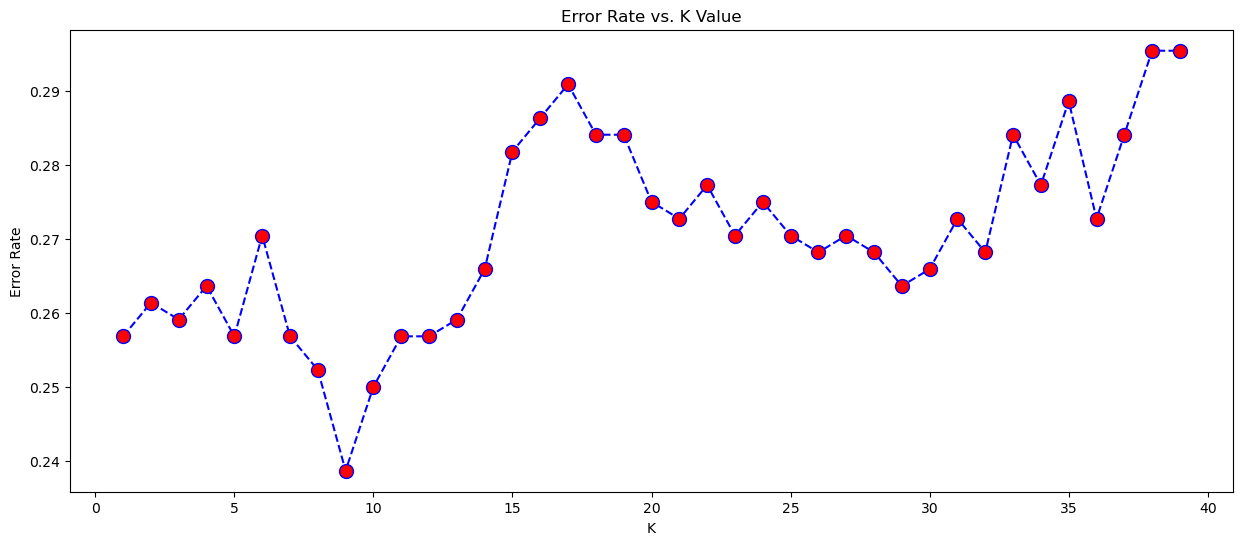

In [77]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,6))
plt.plot(
    range(1,40),error_rate,color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [82]:
model = KNeighborsClassifier(n_neighbors=9)

model.fit(X_train,y_train)
pred = model.predict(X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=9


[[14  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  2  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 11  3  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0 18  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  1  5  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0 11  1  2  0  0  0  0  1  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  3  0  2 16  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0 